In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [4]:
# import model vit_minst
import vit_tests

model: tf.keras.Model = tf.keras.models.load_model('./vit_cifar100',
                                               custom_objects={
                                                      'ClassToken': vit_tests.ClassToken,
                                                      'AddPositionEmbs': vit_tests.AddPositionEmbs,
                                                      'MultiHeadSelfAttention': vit_tests.MultiHeadSelfAttention,
                                                      'TransformerBlock': vit_tests.TransformerBlock,
                                                      'ViT': vit_tests.ViT,
                                                    }
                                                ) # type: ignore

model.summary()

TypeError: __init__() missing 1 required positional argument: 'name'

# Transform 16x16 patch using dense layer?

In [11]:
model.layers

In [12]:
# output shape
[var.name for var in model.layers[2].variables]

['layer_normalization/gamma:0', 'layer_normalization/beta:0']

In [13]:
# check shapes
for var in model.layers[2].variables:
    print(var.name, var.shape)

layer_normalization/gamma:0 (32,)
layer_normalization/beta:0 (32,)


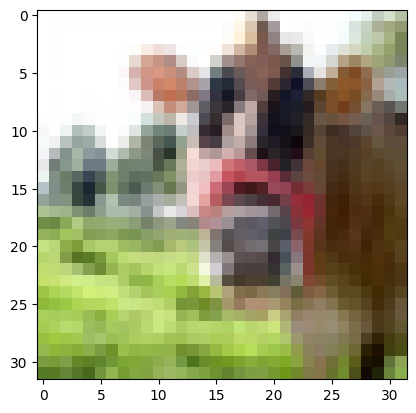

In [14]:
train, test = keras.datasets.cifar100.load_data()

x_train, y_train = train

y_train = y_train.astype("float32")

x_train = x_train / 255.0

x_train = x_train.reshape(x_train.shape[0], 32, 32, 3)

x_test, y_test = test

x_test = x_test / 255.0

x_test = x_test.reshape(x_test.shape[0], 32, 32, 3)

y_test = y_test.astype("float32")


import matplotlib.pyplot as plt

sample = x_train[0].reshape(32, 32, 3)

plt.imshow(sample)

(16, 64, 64)
(64, 64)
(16, 64, 64)
(64, 64)
(16, 64, 64)
(64, 64)
(16, 64, 64)
(64, 64)
(16, 64, 64)
(64, 64)
(16, 64, 64)
(64, 64)
(16, 64, 64)
(64, 64)
(16, 64, 64)
(64, 64)
(16, 64, 64)
(64, 64)
(16, 64, 64)
(64, 64)
(16, 64, 64)
(64, 64)
(16, 64, 64)
(64, 64)
(16, 64, 64)
(64, 64)
(16, 64, 64)
(64, 64)
(16, 64, 64)
(64, 64)
(16, 64, 64)
(64, 64)
(16, 64, 64)
(64, 64)
(16, 64, 64)
(64, 64)
(16, 64, 64)
(64, 64)
(16, 64, 64)
(64, 64)
(16, 64, 64)
(64, 64)
(16, 64, 64)
(64, 64)
(16, 64, 64)
(64, 64)
(16, 64, 64)
(64, 64)
(16, 64, 64)
(64, 64)


C:\Users\Maciej\AppData\Local\Temp\ipykernel_8216\2229723718.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 5))


(16, 64, 64)
(64, 64)
(16, 64, 64)
(64, 64)
(16, 64, 64)
(64, 64)
(16, 64, 64)
(64, 64)
(16, 64, 64)
(64, 64)
(16, 64, 64)
(64, 64)
(16, 64, 64)
(64, 64)
(16, 64, 64)
(64, 64)
(16, 64, 64)
(64, 64)
(16, 64, 64)
(64, 64)
(16, 64, 64)
(64, 64)
(16, 64, 64)
(64, 64)
(16, 64, 64)
(64, 64)
(16, 64, 64)
(64, 64)
(16, 64, 64)
(64, 64)
(16, 64, 64)
(64, 64)
(16, 64, 64)
(64, 64)
(16, 64, 64)
(64, 64)
(16, 64, 64)
(64, 64)
(16, 64, 64)
(64, 64)
(16, 64, 64)
(64, 64)
(16, 64, 64)
(64, 64)
(16, 64, 64)
(64, 64)
(16, 64, 64)
(64, 64)
(16, 64, 64)
(64, 64)


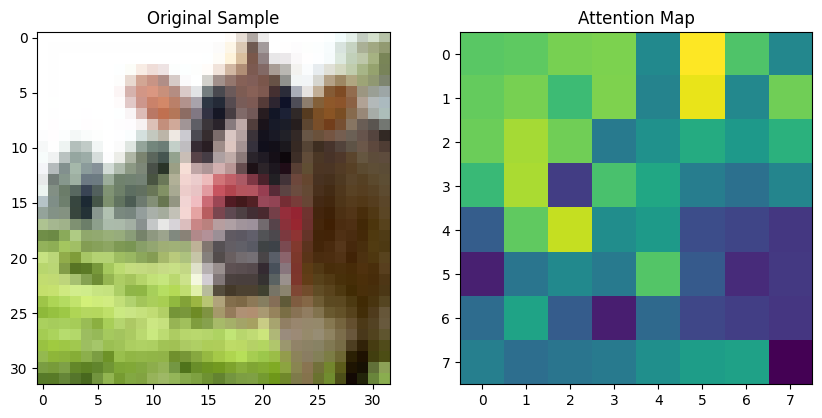

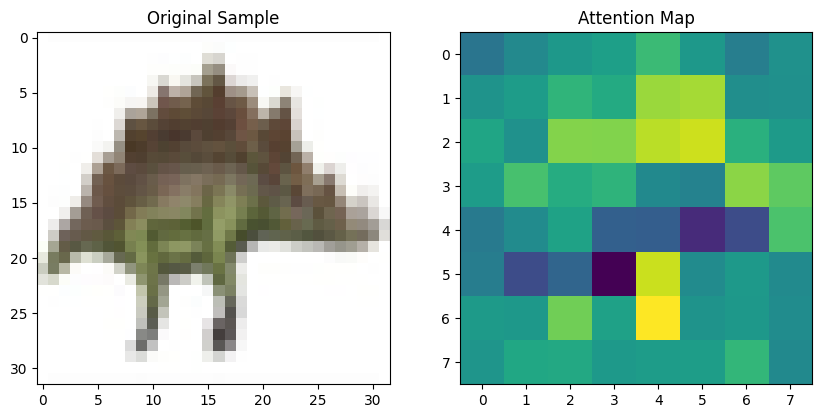

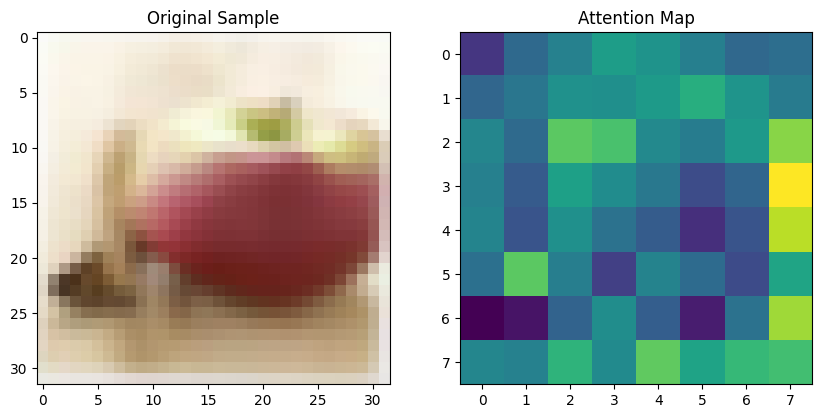

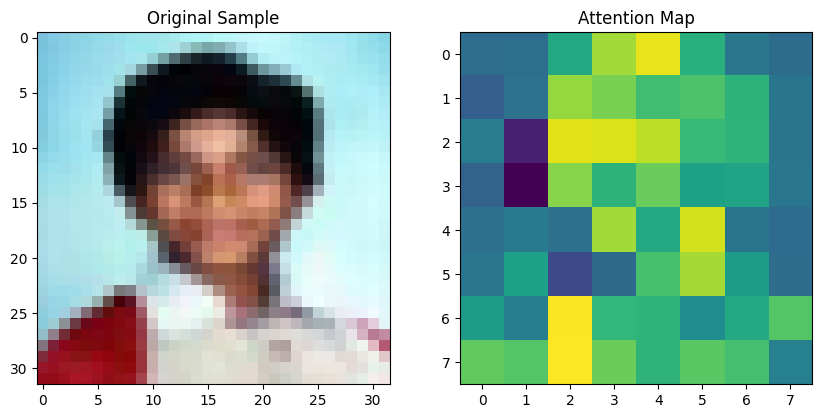

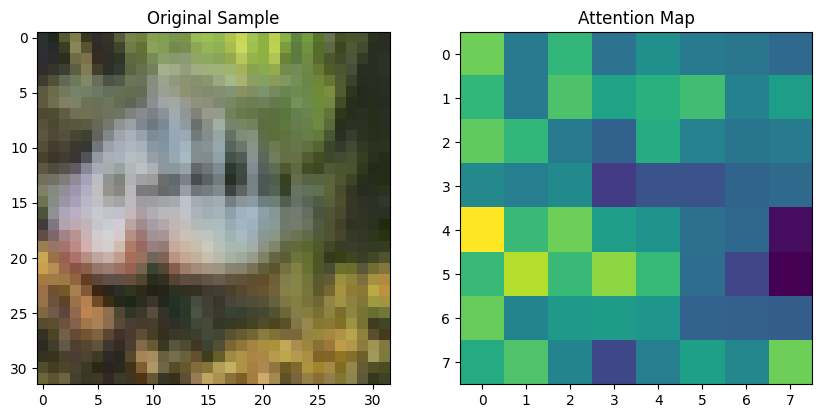

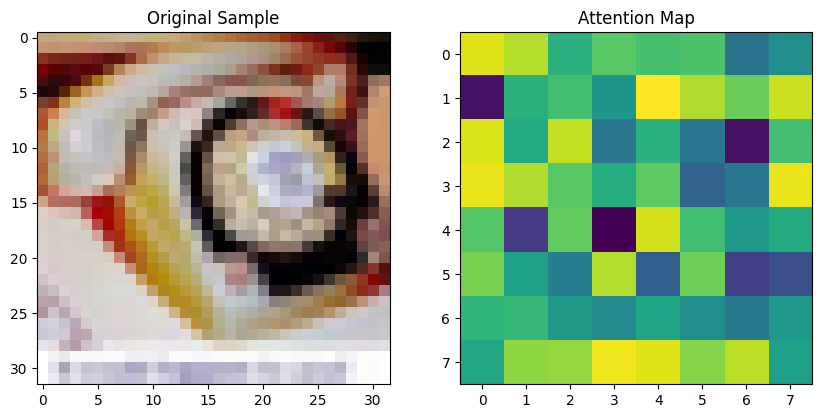

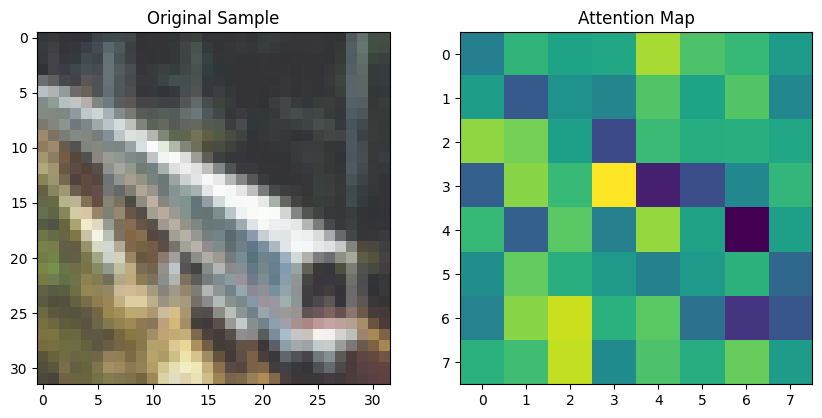

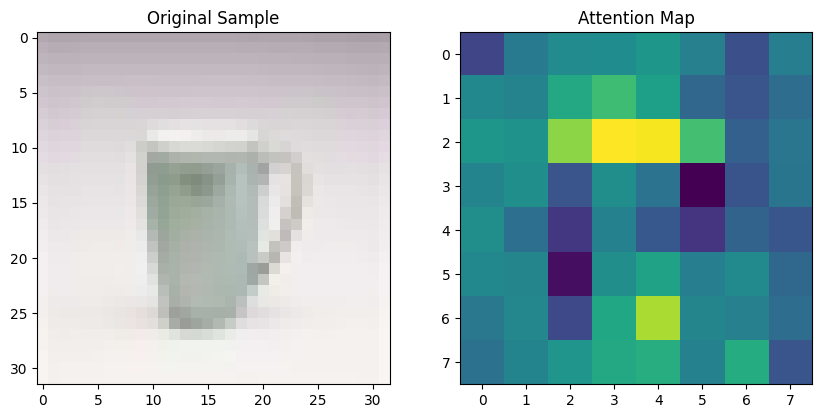

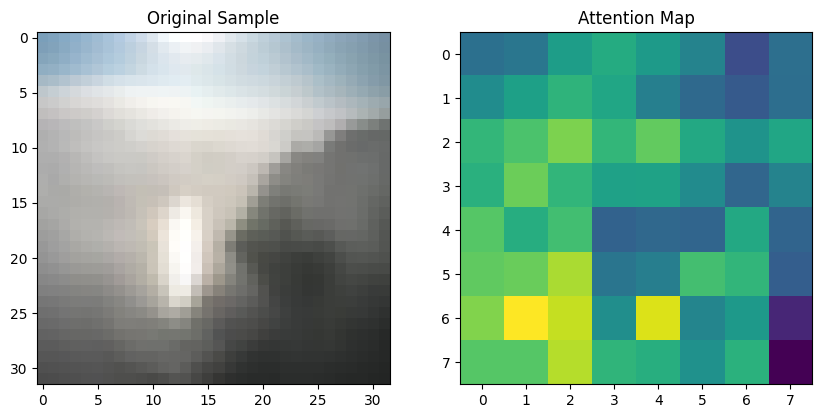

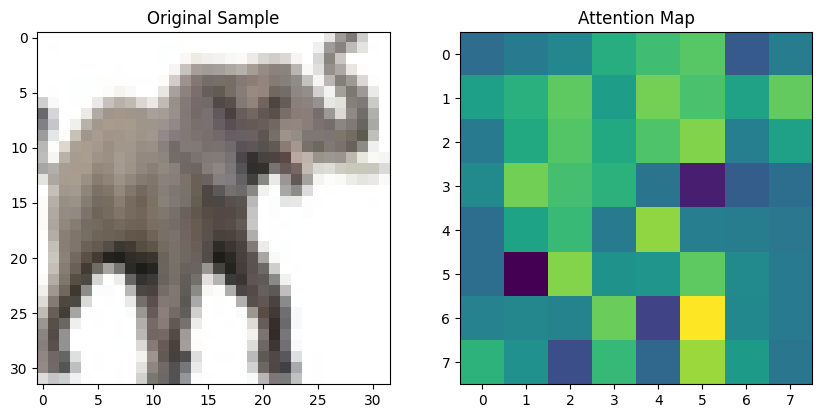

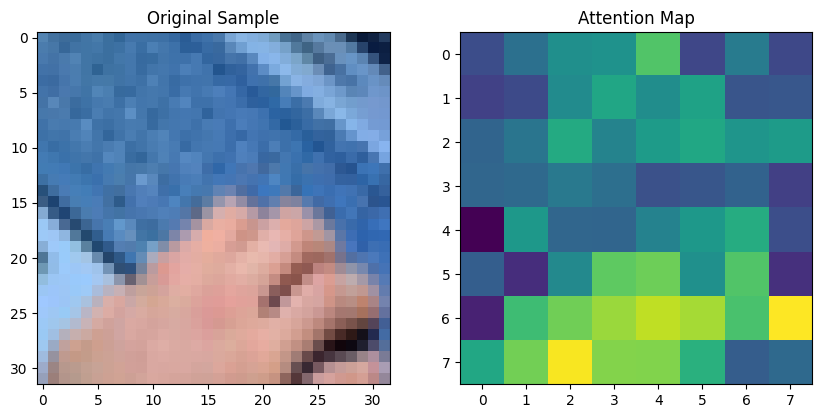

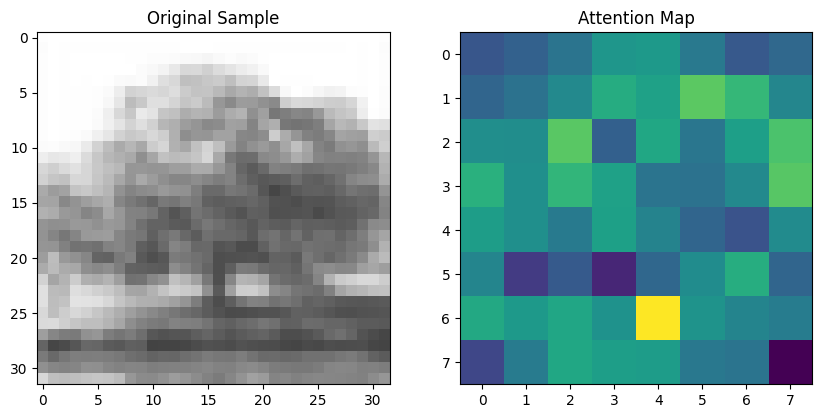

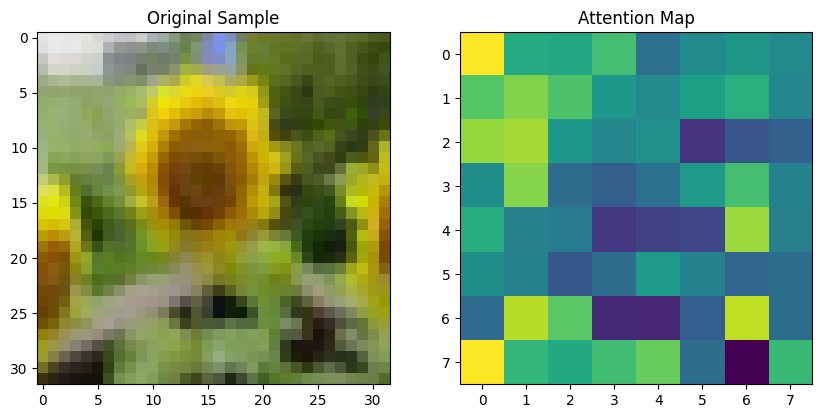

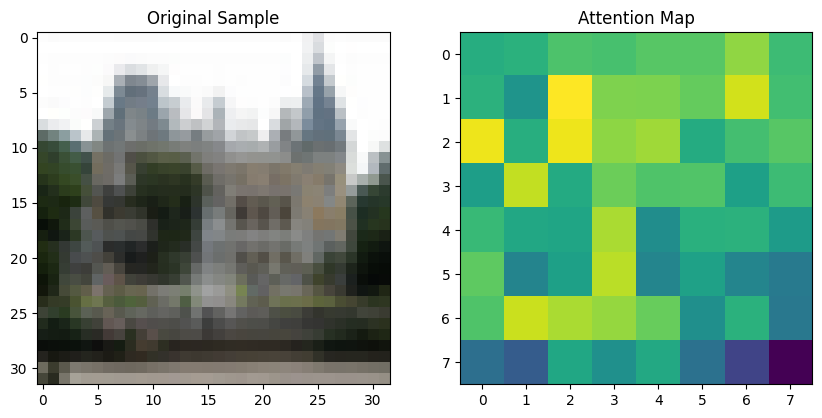

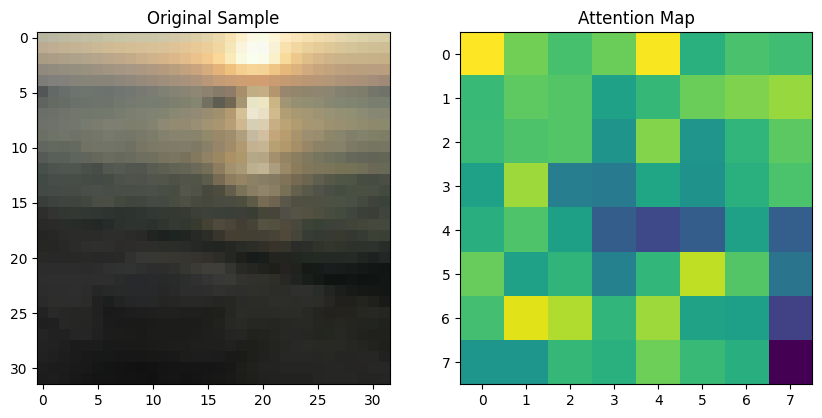

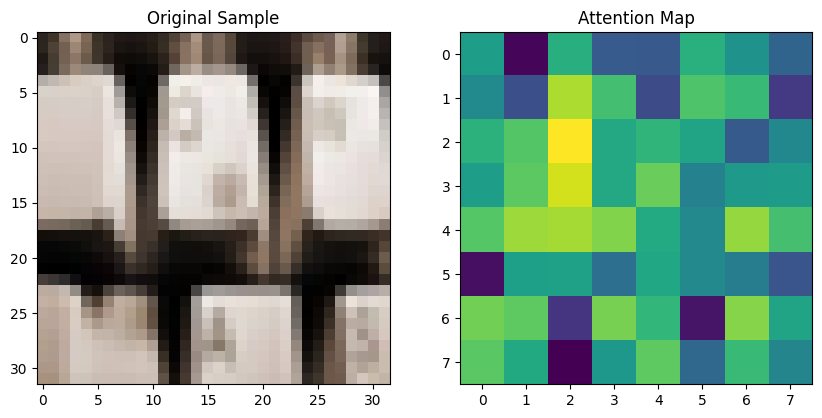

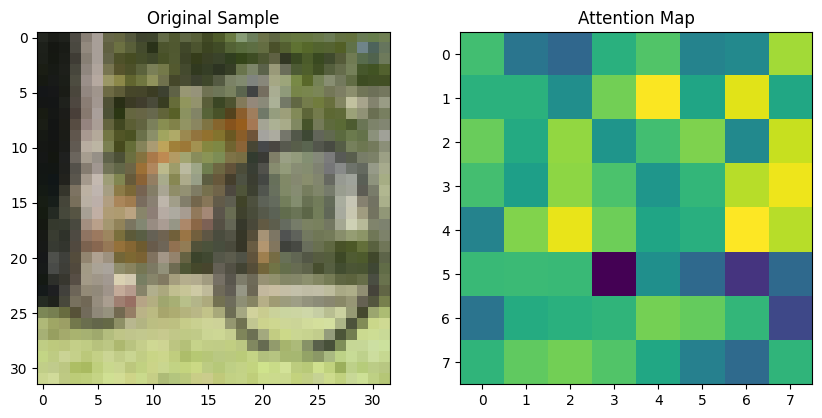

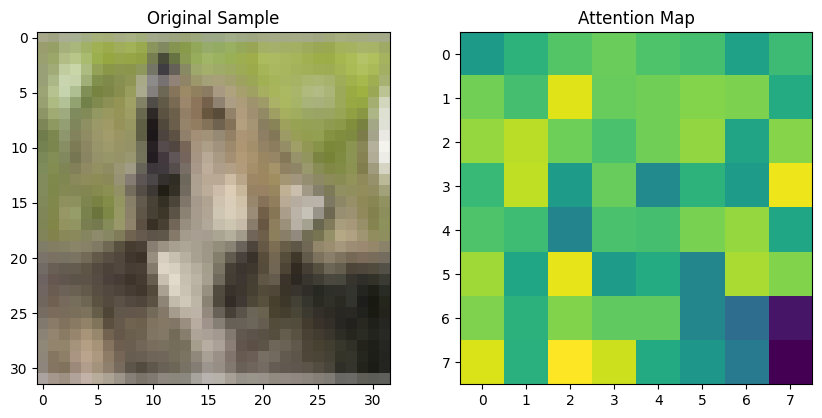

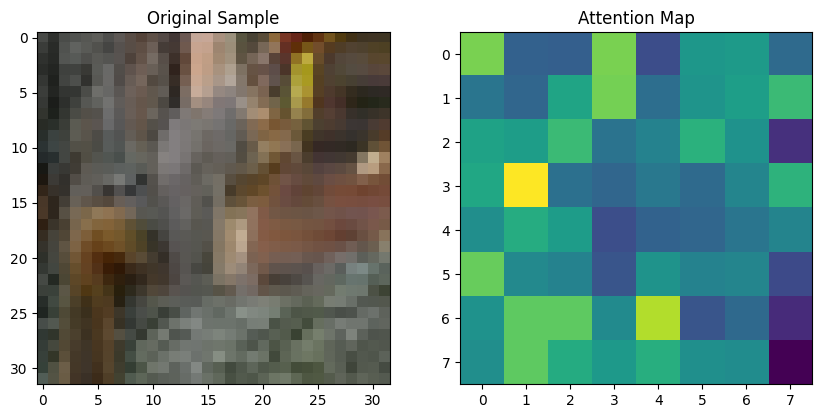

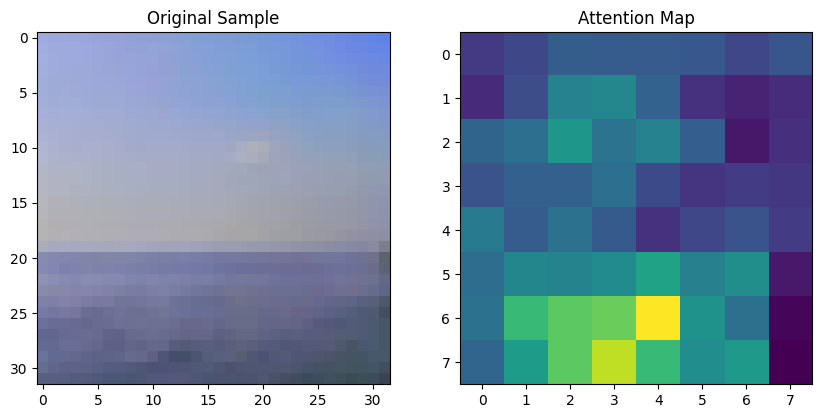

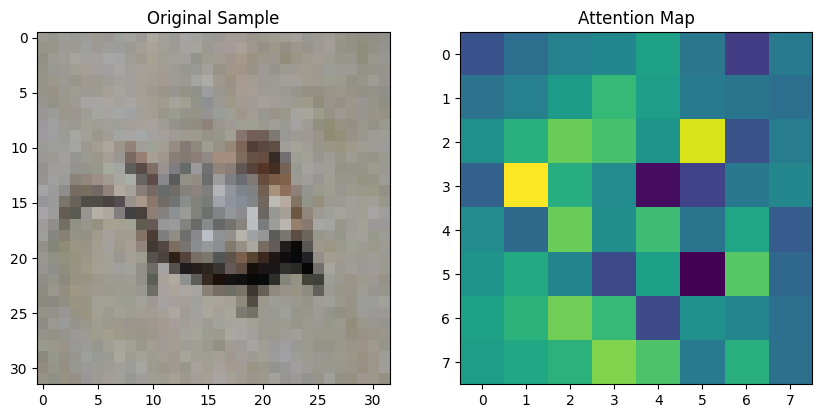

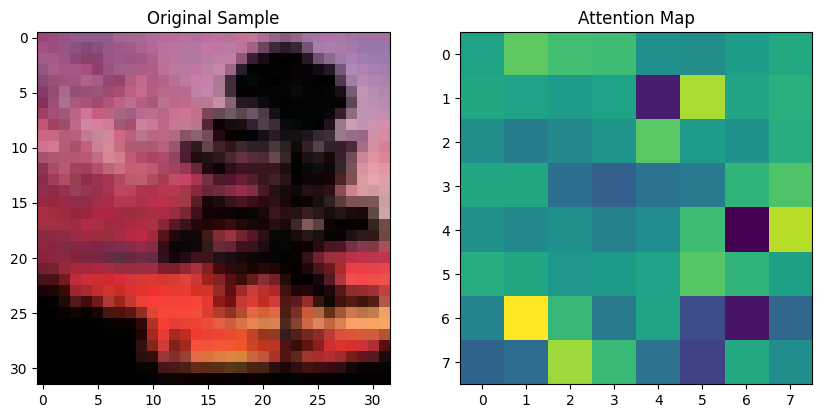

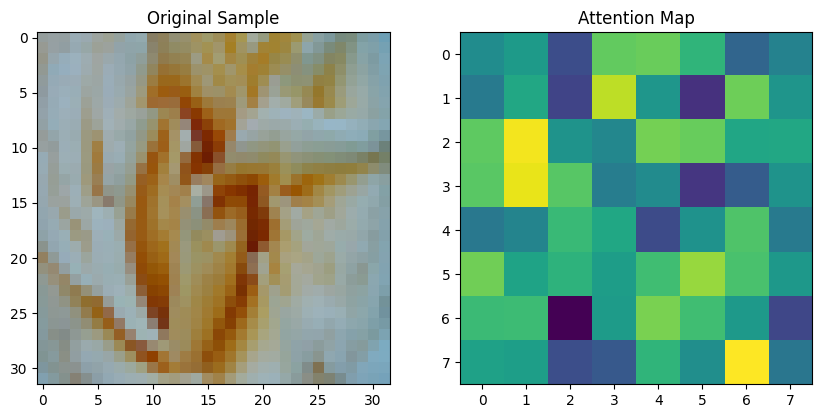

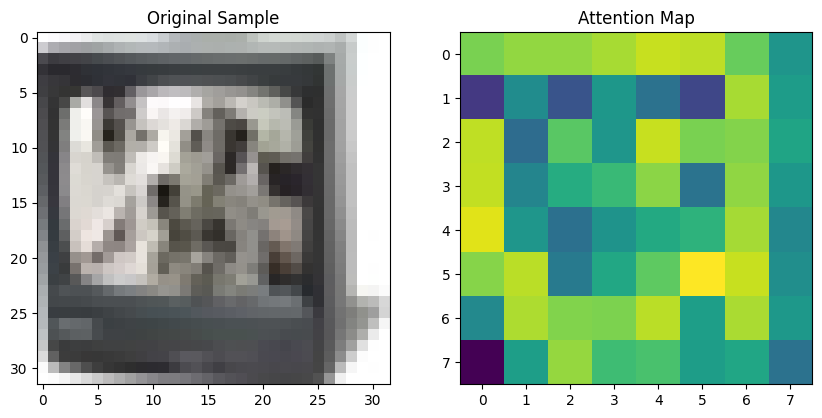

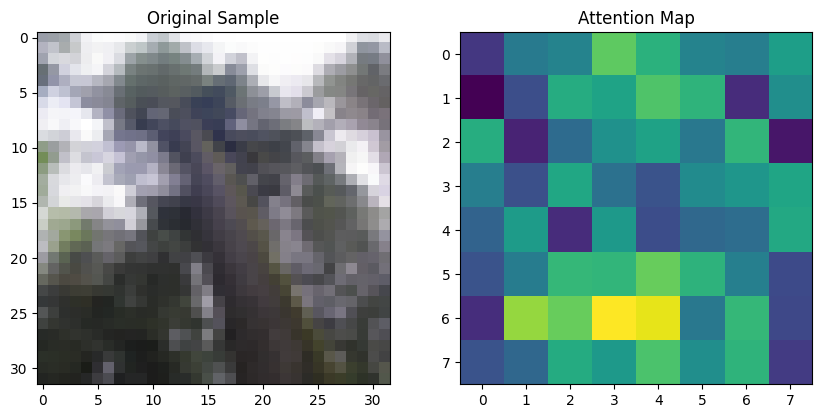

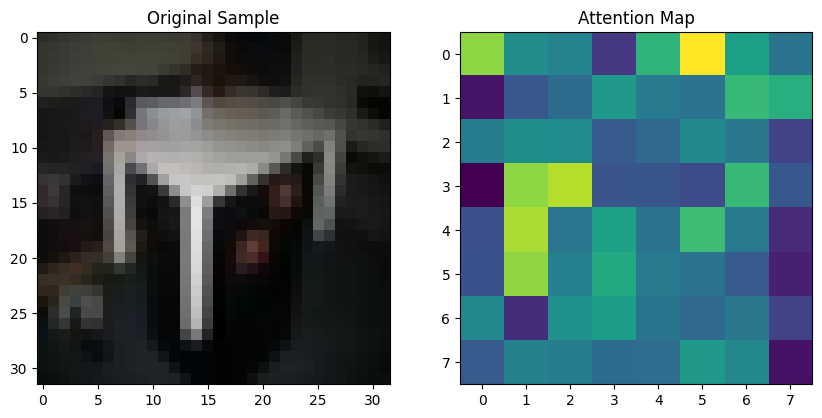

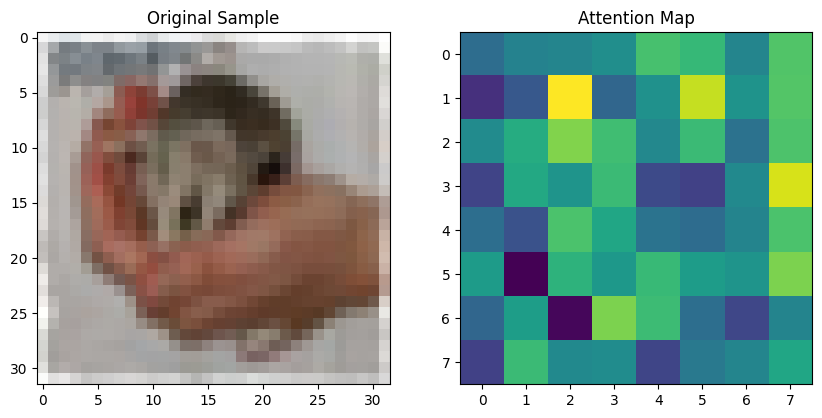

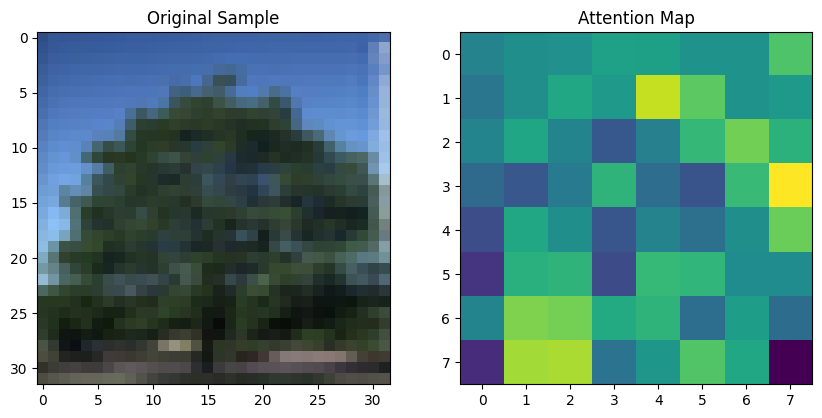

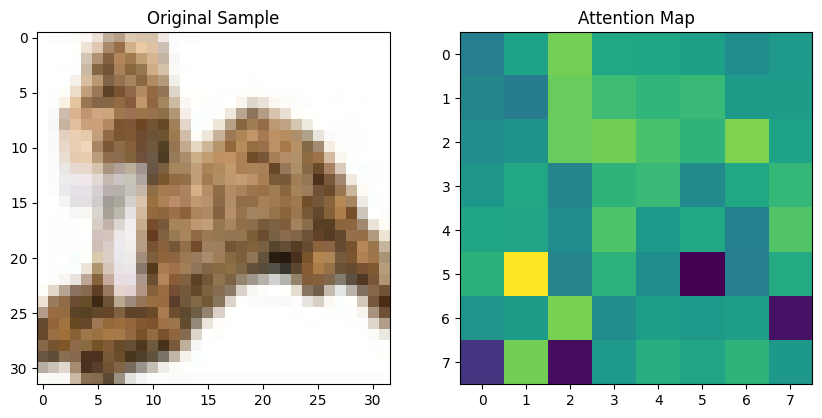

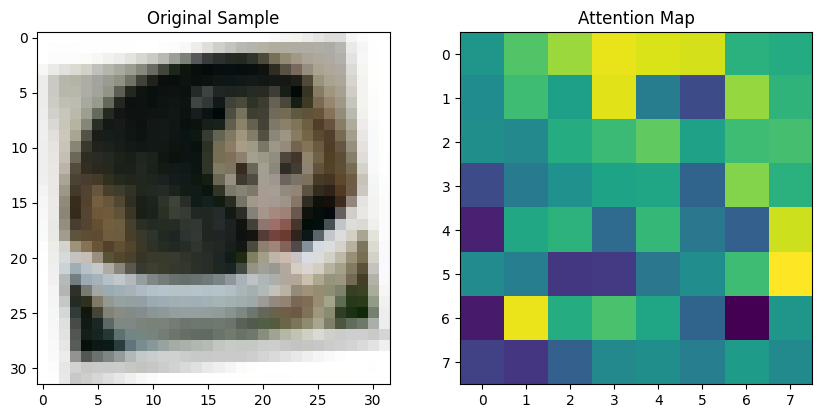

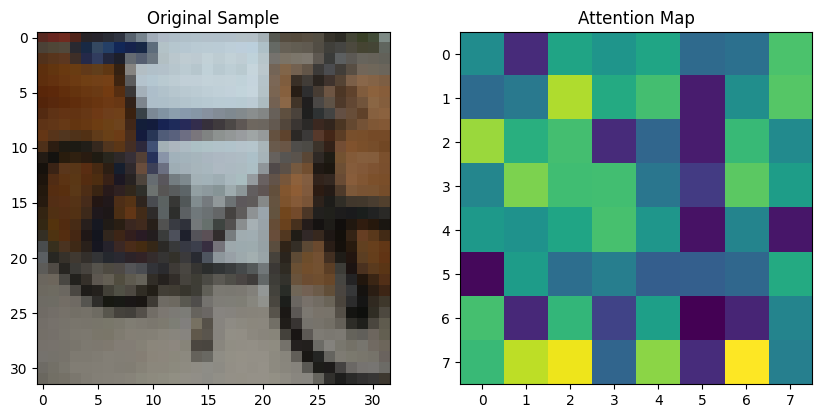

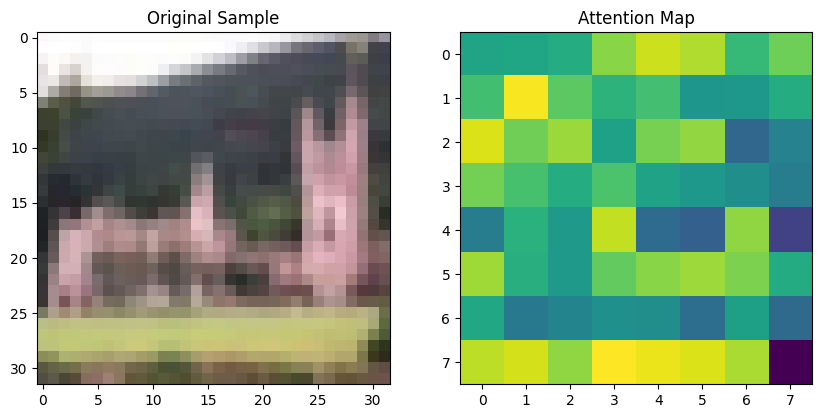

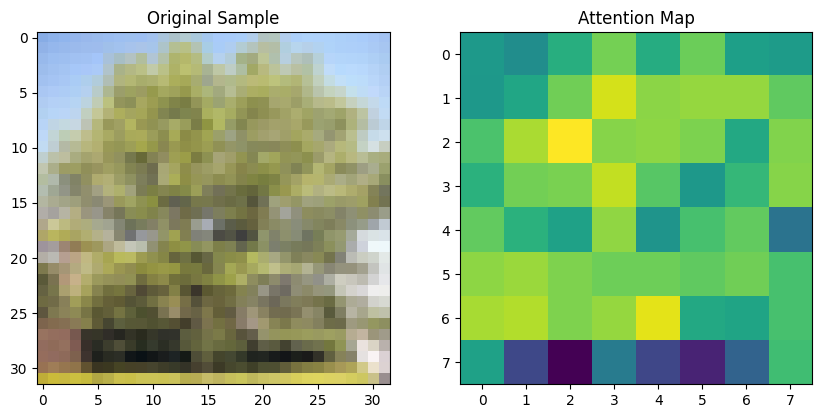

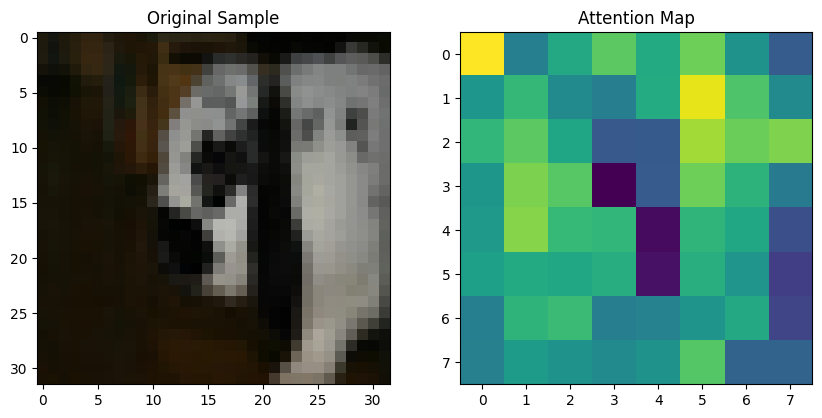

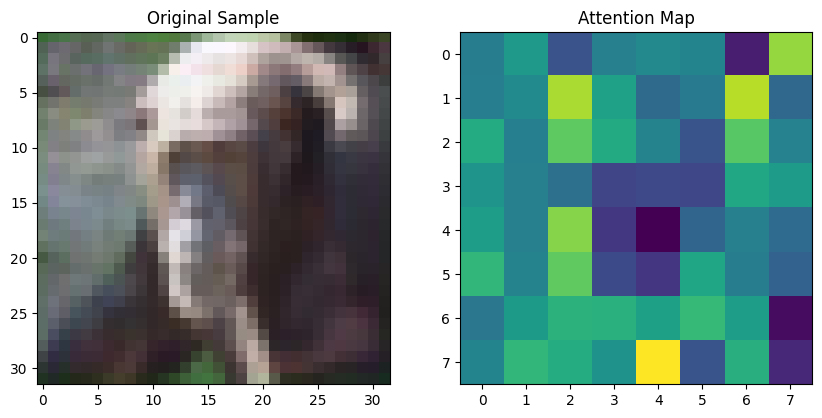

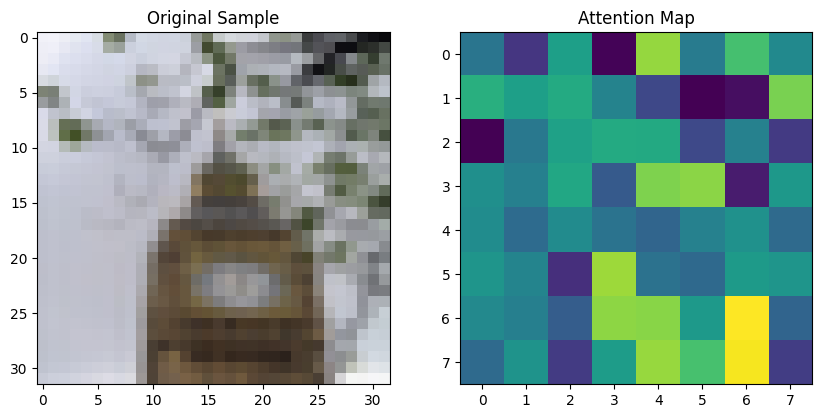

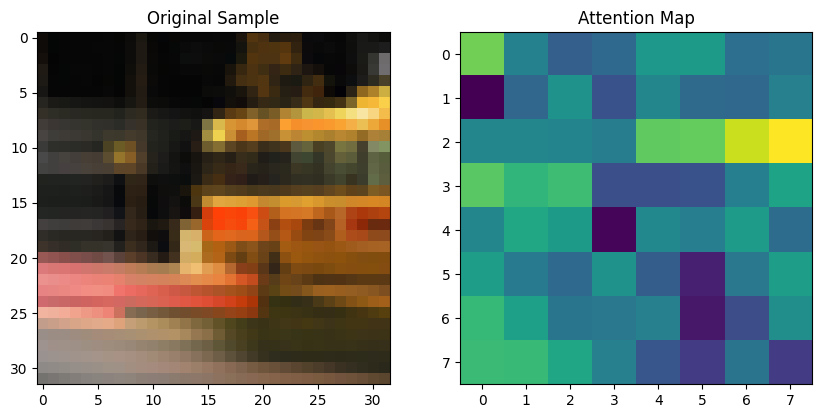

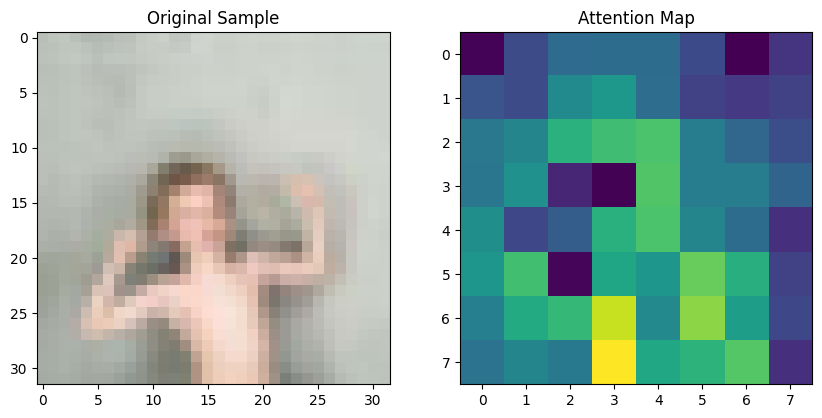

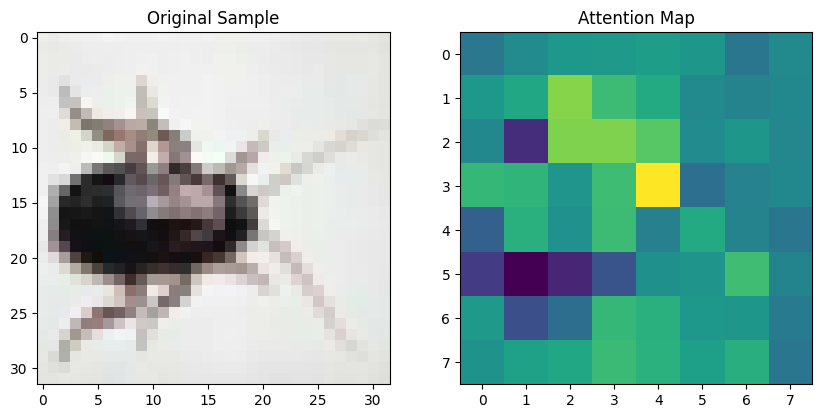

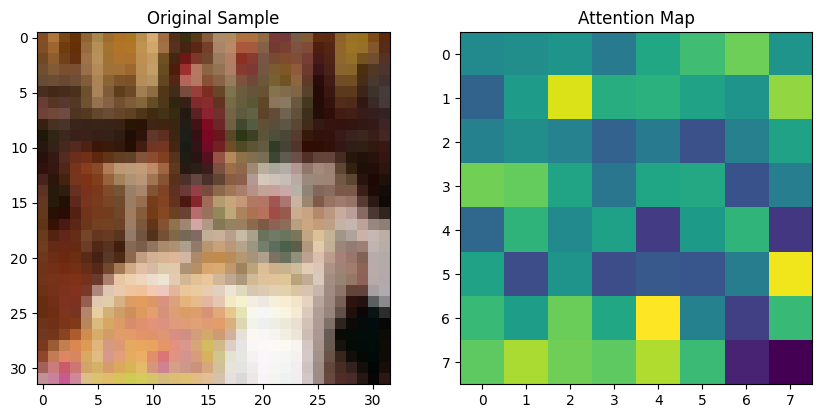

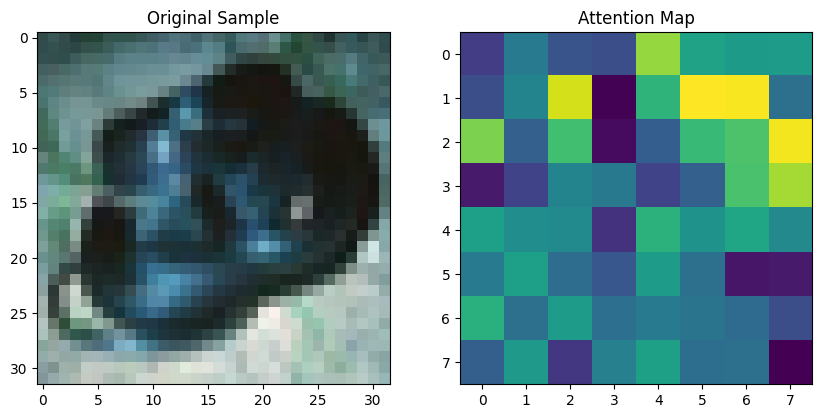

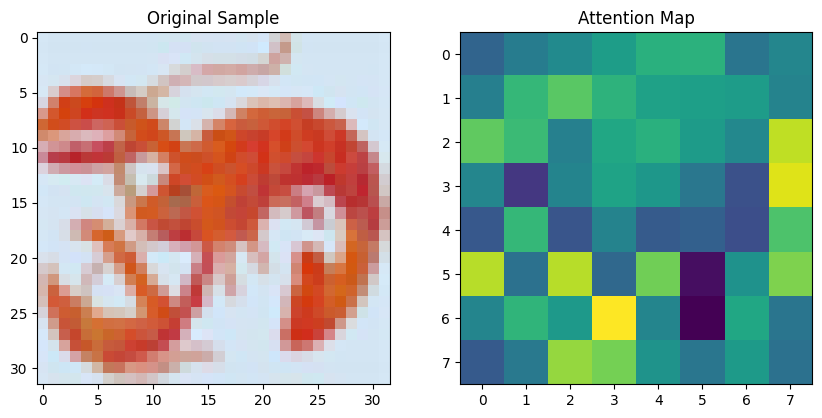

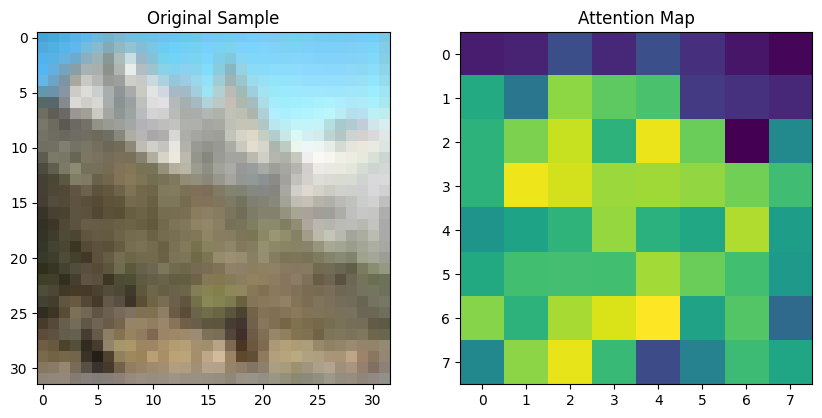

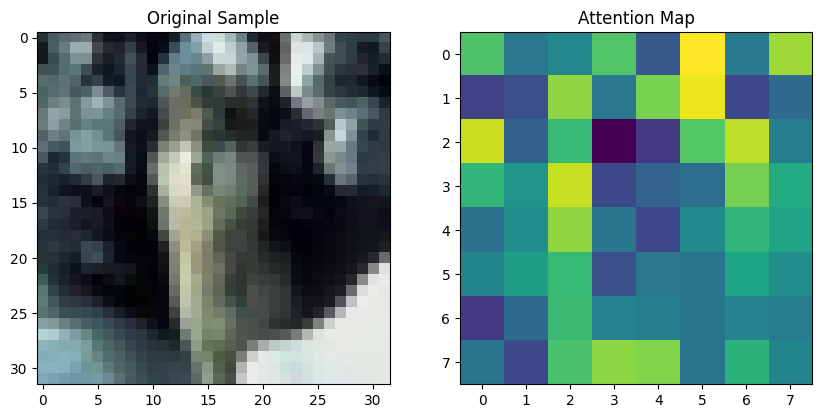

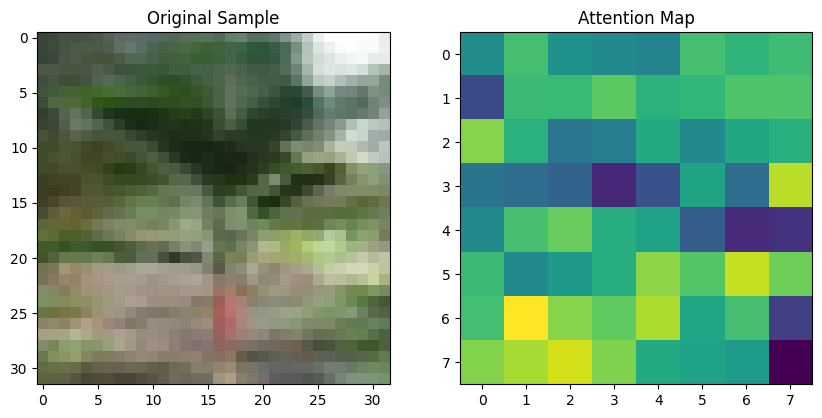

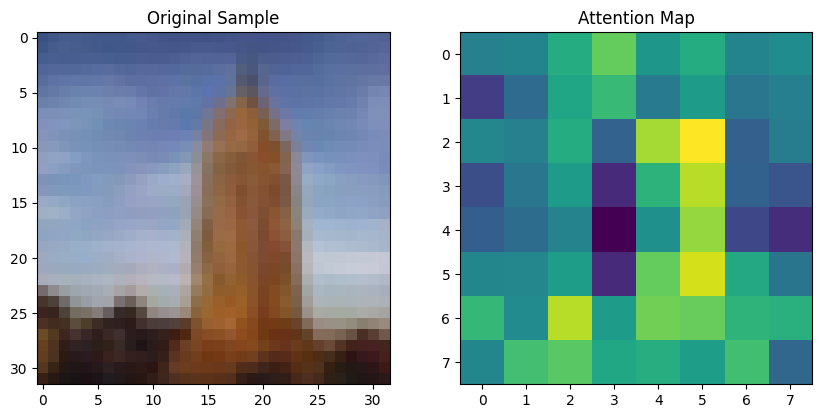

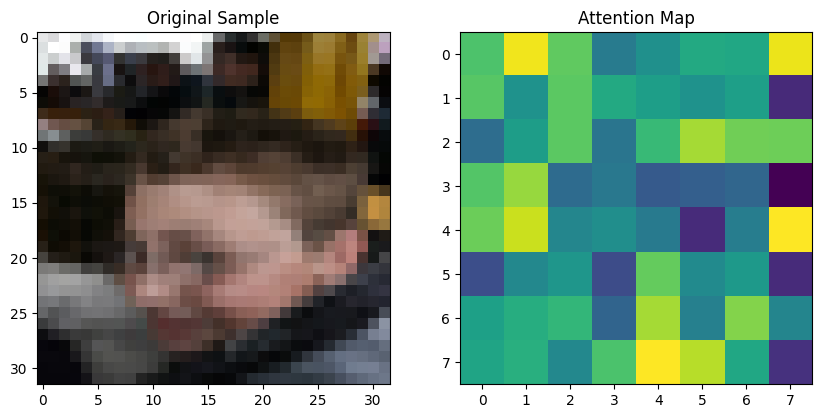

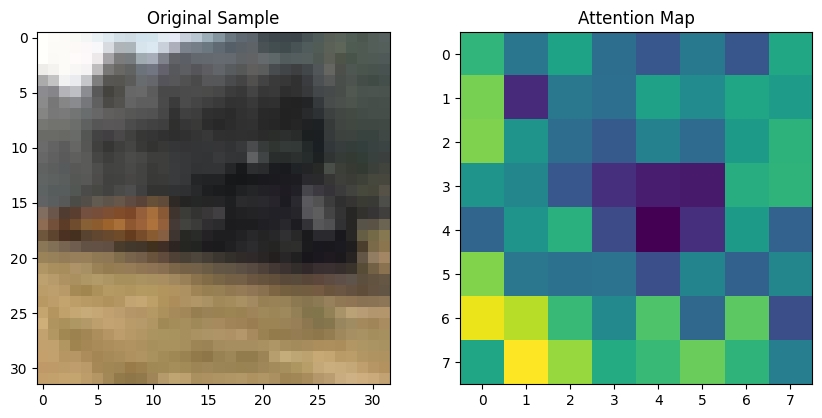

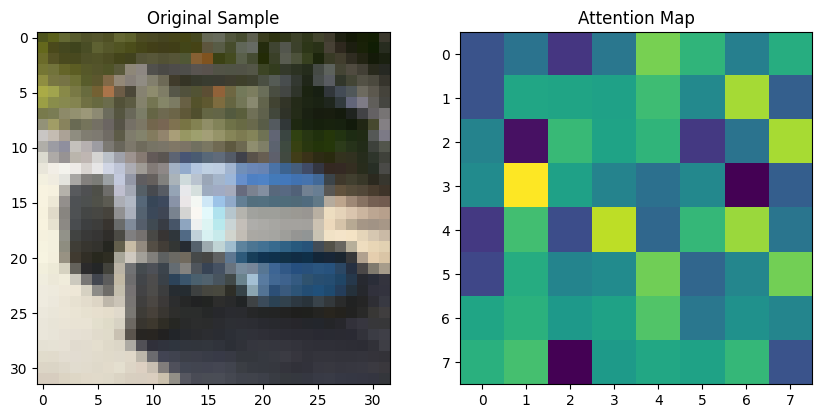

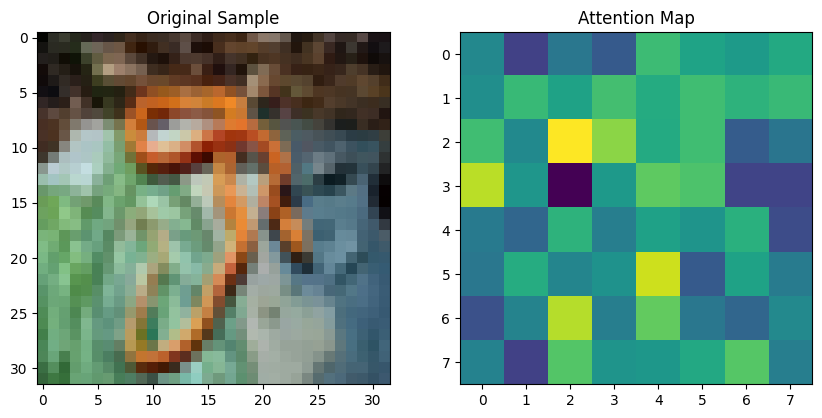

In [27]:
for i in range(50):
    sample = x_train[i].reshape(1, 32, 32, 3)

    plt.figure(figsize=(10, 5))

    # First plot: Original sample
    plt.subplot(1, 2, 1)
    plt.imshow(sample.reshape(32, 32, 3), cmap='gray')
    plt.title('Original Sample')

    # Second plot: Attention map
    attentions = model.compute_attention_map(sample).numpy()
    attentions = np.squeeze(attentions)
    attentions = np.mean(attentions, axis=0)
    print(attentions.shape)
    # strip empty dimensions (all of them )
    numpy = np.mean(attentions, axis=0)
    #numpy = attentions.numpy()[4]
    print(numpy.shape)
    plt.subplot(1, 2, 2)
    plt.imshow(np.mean(numpy, axis=0).reshape(8, 8), cmap='viridis')
    plt.title('Attention Map')

plt.show()